The first thing to do will be to scrape review data from the web. For this, you should use a website called Skytrax.

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | My family and I have flown ...
1,✅ Trip Verified | This has been by far the wo...
2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,Not Verified | BA is not treating its premium ...
4,✅ Trip Verified | 24 hours before our departu...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
df.to_csv(r"C:\Users\INDHUJA\Downloads\CAPSTON PROJECT\BRITISH AIRWAYS\DATA\BA_reviews.csv")

In [8]:
df

,reviews
0,✅ Trip Verified | My family and I have flown ...
1,✅ Trip Verified | This has been by far the wo...
2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,Not Verified | BA is not treating its premium ...
4,✅ Trip Verified | 24 hours before our departu...
...,...
995,Not Verified | Glasgow to Miami via London. G...
996,✅ Trip Verified | London Heathrow to Budapest...
997,✅ Trip Verified | Budapest to London Heathrow...
998,✅ Trip Verified | London to Toronto. Group of...


Removing the parts before | in the reviews column

In [10]:
df.reviews=df.reviews.str.split('|',expand=True)[1]

In [11]:
df

,reviews
0,My family and I have flown mostly on British...
1,This has been by far the worst service I hav...
2,In Nov 2022 I booked and paid for a return j...
3,BA is not treating its premium economy passen...
4,24 hours before our departure on BA059 to Ca...
...,...
995,Glasgow to Miami via London. Glasgow to Heat...
996,London Heathrow to Budapest. After so much d...
997,Budapest to London Heathrow. The flight depa...
998,London to Toronto. Group of 10 people age fr...


*Inference:* We remove the unwanted things from the reviews

**How to analyzing text without training or using machine learning models. how to identify which the text is labeled as positive/negative/neutral**

Here are some ways to analyze text without training or using machine learning models to identify which the text is labeled as positive/negative/neutral:

**Use sentiment lexicons :** A sentiment lexicon is a list of words that have been assigned a sentiment polarity, such as positive, negative, or neutral. By looking up the words in a text in a sentiment lexicon, you can get a general sense of the overall sentiment of the text.

**Use rule-based systems :** Rule-based systems are a set of rules that can be used to determine the sentiment of a text. These rules can be based on the presence of certain words or phrases, the use of negation, or the overall structure of the text.

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# Step 1: Cleaning the text

In [12]:
import string

# Define a function to clean the text
def clean(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = ''.join([i for i in text if not i.isdigit()])
    # Convert to lowercase and remove leading/trailing spaces
    text = text.lower().strip()
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()


,reviews,Cleaned Reviews
0,My family and I have flown mostly on British...,my family and i have flown mostly on british a...
1,This has been by far the worst service I hav...,this has been by far the worst service i have ...
2,In Nov 2022 I booked and paid for a return j...,in nov i booked and paid for a return journey...
3,BA is not treating its premium economy passen...,ba is not treating its premium economy passeng...
4,24 hours before our departure on BA059 to Ca...,hours before our departure on ba to cape town ...


# Step 2: Tokenization

Tokenization is the process of breaking a text into smaller units, called tokens. These tokens can be words, phrases, or even punctuation marks. Tokenization is a common first step in many natural language processing (NLP) tasks, such as sentiment analysis, machine translation, and text classification.

There are two main types of tokenization: word tokenization and sentence tokenization. Word tokenization breaks a text into individual words, while sentence tokenization breaks a text into individual sentences.

# Step 3: Enrichment – POS tagging

Enrichment – POS tagging is a process of assigning each token in a text a part-of-speech (POS) tag. POS tags are labels that indicate the grammatical category of a word, such as noun, verb, adjective, adverb, preposition, conjunction, or interjection.
By knowing the POS tags of the words in a text, it is possible to understand the grammatical structure of the text and to disambiguate words that have multiple meanings.

# Step 4: Stopwords removal
Stopwords removal is a process of removing common words from a text that do not contribute much to the meaning of the text. Stopwords are words that are very common in a language, such as "the", "and", "of", and "to". They are often removed from text before it is analyzed by a natural language processing (NLP) algorithm.

# Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

**NLTK** is a leading platform for building Python programs to work with human language data. 

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [13]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\INDHUJA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\INDHUJA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\INDHUJA\AppData\Roaming\nltk_data...


In [14]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a 
#diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\INDHUJA\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\INDHUJA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,My family and I have flown mostly on British...,my family and i have flown mostly on british a...,"[(family, n), (flown, v), (mostly, r), (britis..."
1,This has been by far the worst service I hav...,this has been by far the worst service i have ...,"[(far, r), (worst, a), (service, n), (plane, n..."
2,In Nov 2022 I booked and paid for a return j...,in nov i booked and paid for a return journey...,"[(nov, a), (booked, v), (paid, v), (return, n)..."
3,BA is not treating its premium economy passen...,ba is not treating its premium economy passeng...,"[(ba, n), (treating, v), (premium, a), (econom..."
4,24 hours before our departure on BA059 to Ca...,hours before our departure on ba to cape town ...,"[(hours, n), (departure, n), (ba, n), (cape, v..."


In [15]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,My family and I have flown mostly on British...,my family and i have flown mostly on british a...,"[(family, n), (flown, v), (mostly, r), (britis...",family fly mostly british airway last year p...
1,This has been by far the worst service I hav...,this has been by far the worst service i have ...,"[(far, r), (worst, a), (service, n), (plane, n...",far bad service plane obvious fly economy fr...
2,In Nov 2022 I booked and paid for a return j...,in nov i booked and paid for a return journey...,"[(nov, a), (booked, v), (paid, v), (return, n)...",nov book pay return journey new zealand retu...
3,BA is not treating its premium economy passen...,ba is not treating its premium economy passeng...,"[(ba, n), (treating, v), (premium, a), (econom...",ba treat premium economy passenger respect p...
4,24 hours before our departure on BA059 to Ca...,hours before our departure on ba to cape town ...,"[(hours, n), (departure, n), (ba, n), (cape, v...",hour departure ba cape town heathrow thursda...


In [16]:
df[['reviews','Lemma']]

,reviews,Lemma
0,My family and I have flown mostly on British...,family fly mostly british airway last year p...
1,This has been by far the worst service I hav...,far bad service plane obvious fly economy fr...
2,In Nov 2022 I booked and paid for a return j...,nov book pay return journey new zealand retu...
3,BA is not treating its premium economy passen...,ba treat premium economy passenger respect p...
4,24 hours before our departure on BA059 to Ca...,hour departure ba cape town heathrow thursda...
...,...,...
995,Glasgow to Miami via London. Glasgow to Heat...,glasgow miami via london glasgow heathrow pa...
996,London Heathrow to Budapest. After so much d...,london heathrow budapest much disappointing ...
997,Budapest to London Heathrow. The flight depa...,budapest london heathrow flight depart time ...
998,London to Toronto. Group of 10 people age fr...,london toronto group people age business cla...


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [17]:
!pip install vaderSentiment

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,My family and I have flown mostly on British...,my family and i have flown mostly on british a...,"[(family, n), (flown, v), (mostly, r), (britis...",family fly mostly british airway last year p...,0.9422,Positive
1,This has been by far the worst service I hav...,this has been by far the worst service i have ...,"[(far, r), (worst, a), (service, n), (plane, n...",far bad service plane obvious fly economy fr...,0.3287,Neutral
2,In Nov 2022 I booked and paid for a return j...,in nov i booked and paid for a return journey...,"[(nov, a), (booked, v), (paid, v), (return, n)...",nov book pay return journey new zealand retu...,-0.5801,Negative
3,BA is not treating its premium economy passen...,ba is not treating its premium economy passeng...,"[(ba, n), (treating, v), (premium, a), (econom...",ba treat premium economy passenger respect p...,0.6597,Positive
4,24 hours before our departure on BA059 to Ca...,hours before our departure on ba to cape town ...,"[(hours, n), (departure, n), (ba, n), (cape, v...",hour departure ba cape town heathrow thursda...,-0.7713,Negative


In [19]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    488
Negative    399
Neutral     113
Name: Analysis, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x208dd710040>,
 [Text(0.04145918200033701, 1.099218420618879, 'Positive'),
  Text(-0.4209517756015994, -1.0162674857624152, 'Negative'),
  Text(1.2658227549838803, -0.46924700634635863, 'Neutral')],
 [Text(0.022614099272911095, 0.599573683973934, '48.8%'),
  Text(-0.22961005941905419, -0.5543277195067718, '39.9%'),
  Text(0.7969995123972579, -0.29545181881067023, '11.3%')])

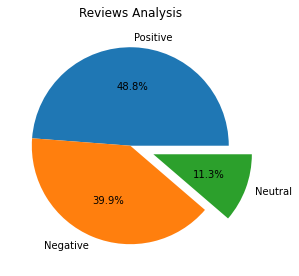

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [21]:
df.to_csv("BA_reviews.csv")

# Wordcloud

A word cloud is a visual representation of text data. It is a cloud-like image of words, where the size of each word corresponds to its frequency in the text. Word clouds are often used to represent the results of text analysis, such as sentiment analysis or topic modeling.

Word clouds are created by first tokenizing the text into individual words. Then, the frequency of each word is calculated. The size of each word in the word cloud is then proportional to its frequency.

In [25]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [29]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

ValueError: Only supported for TrueType fonts